# Getting data

In [8]:
import json

# Open the JSON file
with open('arc-agi_training_challenges.json', 'r') as file:
    # Load the JSON data
    data = json.load(file)

# Now you can work with the data
print(data)

{'007bbfb7': {'test': [{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]]}], 'train': [{'input': [[0, 7, 7], [7, 7, 7], [0, 7, 7]], 'output': [[0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 0, 0, 7, 7, 7, 7, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 7, 7, 0, 7, 7, 0, 7, 7], [7, 7, 7, 7, 7, 7, 7, 7, 7], [0, 7, 7, 0, 7, 7, 0, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 0, 0, 7, 7, 7, 7, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7]]}, {'input': [[4, 0, 4], [0, 0, 0], [0, 4, 0]], 'output': [[4, 0, 4, 0, 0, 0, 4, 0, 4], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 4, 0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 0, 4, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 4, 0, 0, 0, 0]]}, {'input': [[0, 0, 0], [0, 0, 2], [2, 0, 2]], 'output': [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 2], [0, 0, 0, 0, 0, 0, 2, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 2, 0, 0, 0, 0, 0

# class ProblemSet

In [9]:
from typing import List, Dict, Tuple

class Shape:
    def __init__(self, shape: List[Tuple[int, int]]):
        self.shape = shape

    def convert_to_grid(self) -> 'Grid':
        pass

class Grid:
    def __init__(self, grid: List[List[int]]):
        self.grid = grid

    def __repr__(self):
        return '\n'.join(' '.join(str(cell) for cell in row) for row in self.grid)

    def display(self):
        print(self)


class Example:
    def __init__(self, input_grid: Grid, output_grid: Grid = None):
        self.input = input_grid
        self.output = output_grid

    def check_same_dimensions(self) -> bool:
        pass

    def find_shapes(self) -> List[Shape]:
        pass

    def isolate_shapes_in_grid(self) -> List[Grid]:
        pass

    def check_input_in_output(self) -> bool:
        pass

    def check_solution(self) -> bool:
        pass

    def __repr__(self):
        return f"Example {self.input}"
        # return f"Example(input={self.input}, output={self.output})"

    def display(self):
        # print("input:")
        # self.input.display()
        # if self.output:
        #     print("output:")
        #     self.output.display()
        # else:
        #     print("no output:")
        input_rows = self.input.grid
        output_rows = self.output.grid if self.output else None

        # Calculate the maximum width needed for input and output rows
        max_input_width = max(len(' '.join(str(cell) for cell in row)) for row in input_rows)
        max_output_width = max(len(' '.join(str(cell) for cell in row)) for row in output_rows) if output_rows else 0

        print("input:".ljust(max_input_width + 2), "output:" if self.output else "no output:")
        for i in range(len(input_rows)):
            input_row = ' '.join(str(cell) for cell in input_rows[i])
            output_row = ' '.join(str(cell) for cell in output_rows[i]) if output_rows else ''
            print(input_row.ljust(max_input_width + 2), output_row)


class Problem:
    def __init__(self, train: List[Example], test: List[Example], id: str):
        self.test = test
        self.train = train
        self.id = id

    def __repr__(self):
        return f"Problem {self.id} (test len=({len(self.test)}) train len={len(self.train)})"

    def display(self):
        print("Train examples")
        for example in self.train:
            example.display()

        print("Test examples")
        for example in self.test:
            example.display()

    def solve(self) -> List[Grid]:
        """
        Solve the problem
        """
        pass

class ProblemSet:
    def __init__(self, raw_data):
        self.data = self._process_raw_data(raw_data)
        self.raw_data = raw_data

    def _process_raw_data(self, raw_data):
        data = {}
        for problem_id, raw_problem_data in raw_data.items():
            raw_train_data = raw_problem_data['train']
            raw_test_data = raw_problem_data['test']
            train_examples = [Example(Grid(raw_train_data[i]['input']), Grid(raw_train_data[i]['output'])) for i in range(len(raw_train_data))]
            test_examples = [Example(Grid(raw_test_data[i]['input']), output_grid=None) for i in range(len(raw_test_data))]
            data[problem_id] = Problem(train_examples, test_examples, problem_id)
        return data

    def get(self, problem_id):
        return self.data[problem_id]


    def __repr__(self):
        return f"ProblemSet({len(self.data)} problems)"

class Transform:
    def __init__(self):
        pass
    def apply(input: Grid) -> Grid:
        pass

class Agent:
    def __init__(self, problem: Problem):
        self.problem = problem

    def fit(self) -> List[Transform]:
        pass

    def predict(self, transforms: List[Transform], grid: Grid) -> Grid:
        pass

In [10]:
target_key = '25ff71a9'
problem_set = ProblemSet(data)
problem_set


ProblemSet(400 problems)

In [11]:
target_key = '25ff71a9'
"""
What determines movement?

single:
- size,
- color,
- shape,
- starting position(alignment horz,vert?)

group:
relative
- size,
- position
"""
movement_problem1 = problem_set.get(target_key)
movement_problem1

Problem 25ff71a9 (test len=(2) train len=4)

In [12]:
problem_set.raw_data[target_key]

{'test': [{'input': [[2, 0, 0], [2, 0, 0], [0, 0, 0]]},
  {'input': [[0, 0, 0], [0, 1, 0], [0, 0, 0]]}],
 'train': [{'input': [[1, 1, 1], [0, 0, 0], [0, 0, 0]],
   'output': [[0, 0, 0], [1, 1, 1], [0, 0, 0]]},
  {'input': [[0, 0, 0], [1, 1, 1], [0, 0, 0]],
   'output': [[0, 0, 0], [0, 0, 0], [1, 1, 1]]},
  {'input': [[0, 1, 0], [1, 1, 0], [0, 0, 0]],
   'output': [[0, 0, 0], [0, 1, 0], [1, 1, 0]]},
  {'input': [[0, 2, 2], [0, 0, 2], [0, 0, 0]],
   'output': [[0, 0, 0], [0, 2, 2], [0, 0, 2]]}]}

In [13]:
movement_problem1.display()

Train examples
input:  output:
1 1 1   0 0 0
0 0 0   1 1 1
0 0 0   0 0 0
input:  output:
0 0 0   0 0 0
1 1 1   0 0 0
0 0 0   1 1 1
input:  output:
0 1 0   0 0 0
1 1 0   0 1 0
0 0 0   1 1 0
input:  output:
0 2 2   0 0 0
0 0 2   0 2 2
0 0 0   0 0 2
Test examples
input:  no output:
2 0 0   
2 0 0   
0 0 0   
input:  no output:
0 0 0   
0 1 0   
0 0 0   


In [14]:
agent1 = Agent()
transforms = agent1.fit(movement_problem1)
agent1.predict(transforms)

TypeError: Agent.__init__() missing 1 required positional argument: 'problem'

In [15]:
movement1 = data['25ff71a9']
movement1

{'test': [{'input': [[2, 0, 0], [2, 0, 0], [0, 0, 0]]},
  {'input': [[0, 0, 0], [0, 1, 0], [0, 0, 0]]}],
 'train': [{'input': [[1, 1, 1], [0, 0, 0], [0, 0, 0]],
   'output': [[0, 0, 0], [1, 1, 1], [0, 0, 0]]},
  {'input': [[0, 0, 0], [1, 1, 1], [0, 0, 0]],
   'output': [[0, 0, 0], [0, 0, 0], [1, 1, 1]]},
  {'input': [[0, 1, 0], [1, 1, 0], [0, 0, 0]],
   'output': [[0, 0, 0], [0, 1, 0], [1, 1, 0]]},
  {'input': [[0, 2, 2], [0, 0, 2], [0, 0, 0]],
   'output': [[0, 0, 0], [0, 2, 2], [0, 0, 2]]}]}

In [16]:
input2 = movement1['train'][1]['input']
output2 = movement1['train'][1]['output']

In [17]:
def printrows(rows):
    for row in rows:
        # print(row)
        print(' '.join(str(cell) for cell in row))

In [18]:
printrows(input2)

0 0 0
1 1 1
0 0 0


In [ ]:
printrows(output2)

0 0 0
0 0 0
1 1 1


# Analysis

In [ ]:
def dimensions_analysis(input_examples) -> bool:
    for input_example in input_examples:
        input_n_row = len(input_example['input'])
        input_n_col = len(input_example['input'][0])
        output_n_row = len(input_example['output'])
        output_n_col = len(input_example['output'][0])
        print(f"input_n_row: {input_n_row}, input_n_col: {input_n_col}, output_n_row: {output_n_row}, output_n_col: {output_n_col}")
        if input_n_row != output_n_row or input_n_col != output_n_col:
            print("dimensions mismatch")
            return False

    return True


examples = [
    {
        'input': [[1, 1, 1], [0, 0, 0], [0, 0, 0]],
        'output': [[0, 0, 0], [1, 1, 1], [0, 0, 0]]
    },
    {
        'input': [[0, 0, 0], [1, 1, 1], [0, 0, 0]],
        'output': [[0, 0, 0], [0, 0, 0], [1, 1, 1]]
    },
    {
        'input': [[0, 1, 0], [1, 1, 0], [0, 0, 0]],
        'output': [[0, 0, 0], [0, 1, 0], [1, 1, 0]]
    },
    {
        'input': [[0, 2, 2], [0, 0, 2], [0, 0, 0]],
        'output': [[0, 0, 0], [0, 2, 2], [0, 0, 2]]
    }
]
dimensions_analysis(examples)


input_n_row: 3, input_n_col: 3, output_n_row: 3, output_n_col: 3
input_n_row: 3, input_n_col: 3, output_n_row: 3, output_n_col: 3
input_n_row: 3, input_n_col: 3, output_n_row: 3, output_n_col: 3
input_n_row: 3, input_n_col: 3, output_n_row: 3, output_n_col: 3


True

# Debugging tools

In [ ]:
def printrows(rows):
    for row in rows:
        # print(row)
        print(' '.join(str(cell) for cell in row))

In [ ]:
def convert_1d_to_2d(shape, color="x", full_grid=False):
    if full_grid:
        min_x = 0
        min_y = 0
    else:
        min_x = min(x for x, y in shape)
        min_y = min(y for x, y in shape)

    max_x = max(x for x, y in shape)
    max_y = max(y for x, y in shape)
    # print(shape)
    # print(f"min_x: {min_x}, max_x: {max_x}, min_y: {min_y}, max_y: {max_y}")
    coords = {}
    for x, y in shape:
        coords[(x, y)] = True

    results = []
    for i in range(min_x, max_x + 1):
        row = []
        for j in range(min_y, max_y + 1):
            if (i, j) in coords:
                row.append(color)
            else:
                row.append('0')
        results.append(row)
    return results

example_1d_shape = [(1,1), (1,2), (2,1)]
print("1d shape: ", example_1d_shape)
print('full grid=False')
x = convert_1d_to_2d(example_1d_shape, color="5")
printrows(x)
print('full grid=True')
x = convert_1d_to_2d(example_1d_shape, color="5", full_grid=True)
printrows(x)

1d shape:  [(1, 1), (1, 2), (2, 1)]
full grid=False
5 5
5 0
full grid=True
0 0 0
0 5 5
0 5 0


In [ ]:
def paint_1d_to_2d_grid(shape, color="x", grid=None):
    assert grid is not None

    # Use the provided grid
    results = [row[:] for row in grid]  # Make a copy of the grid
    for x, y in shape:
        if 0 <= x < len(results) and 0 <= y < len(results[0]):
            results[x][y] = color

    return results

# Example usage
example_shape = [(1, 0), (1, 1), (1, 2)]
example_color = '5'
print("1d shape: ", example_shape)
print("2d shape: ", convert_1d_to_2d(example_shape, color=example_color))
example_grid = [
    ['0', '0', '0', '0', '0'],
    ['0', '0', '0', '0', '0'],
    ['0', '0', '0', '0', '0'],
    ['0', '0', '0', '0', '0'],
]
x = paint_1d_to_2d_grid(example_shape, color=example_color, grid=example_grid)
printrows(x)


1d shape:  [(1, 0), (1, 1), (1, 2)]
2d shape:  [['5', '5', '5']]
0 0 0 0 0
5 5 5 0 0
0 0 0 0 0
0 0 0 0 0


# Find the shapes

In [ ]:
def find_shapes_any_color(grid):
    def is_valid(x, y):
        return 0 <= x < len(grid) and 0 <= y < len(grid[0]) and grid[x][y] != 0 and not visited[x][y]

    def dfs(x, y, shape):
        stack = [(x, y)]
        while stack:
            cx, cy = stack.pop()
            shape.append((cx, cy))
            for dx, dy in directions:
                nx, ny = cx + dx, cy + dy
                if is_valid(nx, ny):
                    visited[nx][ny] = True
                    stack.append((nx, ny))

    directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    visited = [[False] * len(grid[0]) for _ in range(len(grid))]
    shapes = []

    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] != 0 and not visited[i][j]:
                visited[i][j] = True
                shape = []
                dfs(i, j, shape)
                shapes.append(shape)

    return shapes

shapes = find_shapes_any_color(input2)
print(f"found n shapes: {len(shapes)}")
print(f"shapes of len: {[len(shape)for shape in shapes]}")
print(shapes)

found n shapes: 1
shapes of len: [3]
[[(1, 0), (1, 1), (1, 2)]]


In [ ]:
def find_shapes_any_color_with_color(grid):
    def is_valid(x, y):
        return 0 <= x < len(grid) and 0 <= y < len(grid[0]) and grid[x][y] != 0 and not visited[x][y]

    def dfs(x, y, shape):
        stack = [(x, y)]
        while stack:
            cx, cy = stack.pop()
            position = (cx, cy)
            color = grid[cx][cy]
            # shape.append((cx, cy))
            shape.append({
                "position": position,
                "color": color
            })
            for dx, dy in directions:
                nx, ny = cx + dx, cy + dy
                if is_valid(nx, ny):
                    visited[nx][ny] = True
                    stack.append((nx, ny))

    directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    visited = [[False] * len(grid[0]) for _ in range(len(grid))]
    shapes = []

    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] != 0 and not visited[i][j]:
                visited[i][j] = True
                shape = []
                dfs(i, j, shape)
                shapes.append(shape)

    return shapes

shapes = find_shapes_any_color_with_color(input2)
print(f"found n shapes: {len(shapes)}")
print(f"shapes of len: {[len(shape)for shape in shapes]}")
print(shapes)

found n shapes: 1
shapes of len: [3]
[[{'position': (1, 0), 'color': 1}, {'position': (1, 1), 'color': 1}, {'position': (1, 2), 'color': 1}]]


# Movement

In [ ]:
def apply_movement(shape, movement):
    dx, dy = movement
    return [(x + dx, y + dy) for x, y in shape]

def all_possible_movements(shape, original_grid):
    # Calculate the dimensions of the shape
    min_row = min(x for x, _ in shape)
    max_row = max(x for x, _ in shape)
    min_col = min(y for _, y in shape)
    max_col = max(y for _, y in shape)

    print(f"shape: {shape}")
    print(f"min_row: {min_row}, max_row: {max_row}, min_col: {min_col}, max_col: {max_col}")

    grid_with_shape = paint_1d_to_2d_grid(shape, color=5, grid=original_grid)
    printrows(grid_with_shape)

    # grid_with_shape = paint_1d_to_2d_grid(shape, color=5, grid=original_grid)
    # printrows(grid_with_shape)
    # Note the y is the y axis and movement denotes width
    # Note the x is the x axis and movement denotes height
    shape_width = max_col - min_col + 1
    shape_height = max_row - min_row + 1
    print(f"shape width: {shape_width}, shape height: {shape_height}")

    # Calculate the dimensions of the original grid
    grid_height = len(original_grid)
    grid_width = len(original_grid[0])

    # Determine the range of possible movements, including negative directions
    possible_movements = []
    # negative limit is relative to where the last s point can move left without falling off the grid
    # example
    # the formula is

    # Note x axis movement depends on the rightmost column position
    # 0 0 5 5   <- max_col=index 3 so it can move 3 to the left along x axis
    # 5 5 5 0   <- max_col=index 2 so it can move 2 to the left along x axis (-2 movement)
    # formula is -(max_col)
    col_negative_move_limit = -(max_col)
    # 0 0 5 5   <- min_col=index 2, grid_width=4 so it can move 1 right without falling off
    # 5 5 5 0   <- min_col=index 0, grid_width=4 so it can move 4 right without falling off (4 movement)
    # formula (grid_width-1) - min_col
    col_positive_move_limit = (grid_width-1) - min_col
    print(f"col_negative_move_limit: {col_negative_move_limit}, col_positive_move_limit: {col_positive_move_limit}")

    row_negative_move_limit = -(shape_height)
    # Note y axis movement depends on the bottommost row position
    # 0
    # 5 <- row index 1 min_row=1 max_row=1
    # 0
    # 0
    # grid_height = 4
    # y_axis_negative = max_row = 1 and can move up -(max_row) which is -1
    # y_axis_positive = (grid_height - 1) - min_row which is (4 - 1)=3-1 = 2
    row_negative_move_limit = -(max_row)
    row_positive_move_limit = (grid_height - 1) - min_row
    print(f"row_negative_move_limit: {row_negative_move_limit}, row_positive_move_limit: {row_positive_move_limit}")
    for d_row in range(row_negative_move_limit, row_positive_move_limit+1):  # Adjusted to allow upward movement
        for d_col in range(col_negative_move_limit, col_positive_move_limit+1):
            possible_movements.append((d_row, d_col))

    return possible_movements

# Example usage
example_shape = [(1, 0), (1, 1), (1, 2)]
example_color = '5'
original_grid = [
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
]  # Example grid
movements = all_possible_movements(example_shape, original_grid)
print(f"Possible movements ({len(movements)}):", movements)

for movement in movements:
    moved_shape = apply_movement(example_shape, movement)
    print(f"Movement: {movement}")
    print(moved_shape)
    grid_with_shape = paint_1d_to_2d_grid(moved_shape, color=5, grid=original_grid)
    printrows(grid_with_shape)

shape: [(1, 0), (1, 1), (1, 2)]
min_row: 1, max_row: 1, min_col: 0, max_col: 2
0 0 0 0
5 5 5 0
0 0 0 0
0 0 0 0
shape width: 3, shape height: 1
col_negative_move_limit: -2, col_positive_move_limit: 3
row_negative_move_limit: -1, row_positive_move_limit: 2
Possible movements (24): [(-1, -2), (-1, -1), (-1, 0), (-1, 1), (-1, 2), (-1, 3), (0, -2), (0, -1), (0, 0), (0, 1), (0, 2), (0, 3), (1, -2), (1, -1), (1, 0), (1, 1), (1, 2), (1, 3), (2, -2), (2, -1), (2, 0), (2, 1), (2, 2), (2, 3)]
Movement: (-1, -2)
[(0, -2), (0, -1), (0, 0)]
5 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
Movement: (-1, -1)
[(0, -1), (0, 0), (0, 1)]
5 5 0 0
0 0 0 0
0 0 0 0
0 0 0 0
Movement: (-1, 0)
[(0, 0), (0, 1), (0, 2)]
5 5 5 0
0 0 0 0
0 0 0 0
0 0 0 0
Movement: (-1, 1)
[(0, 1), (0, 2), (0, 3)]
0 5 5 5
0 0 0 0
0 0 0 0
0 0 0 0
Movement: (-1, 2)
[(0, 2), (0, 3), (0, 4)]
0 0 5 5
0 0 0 0
0 0 0 0
0 0 0 0
Movement: (-1, 3)
[(0, 3), (0, 4), (0, 5)]
0 0 0 5
0 0 0 0
0 0 0 0
0 0 0 0
Movement: (0, -2)
[(1, -2), (1, -1), (1, 0)]
0 0 0 0
5 0 0

# Plot

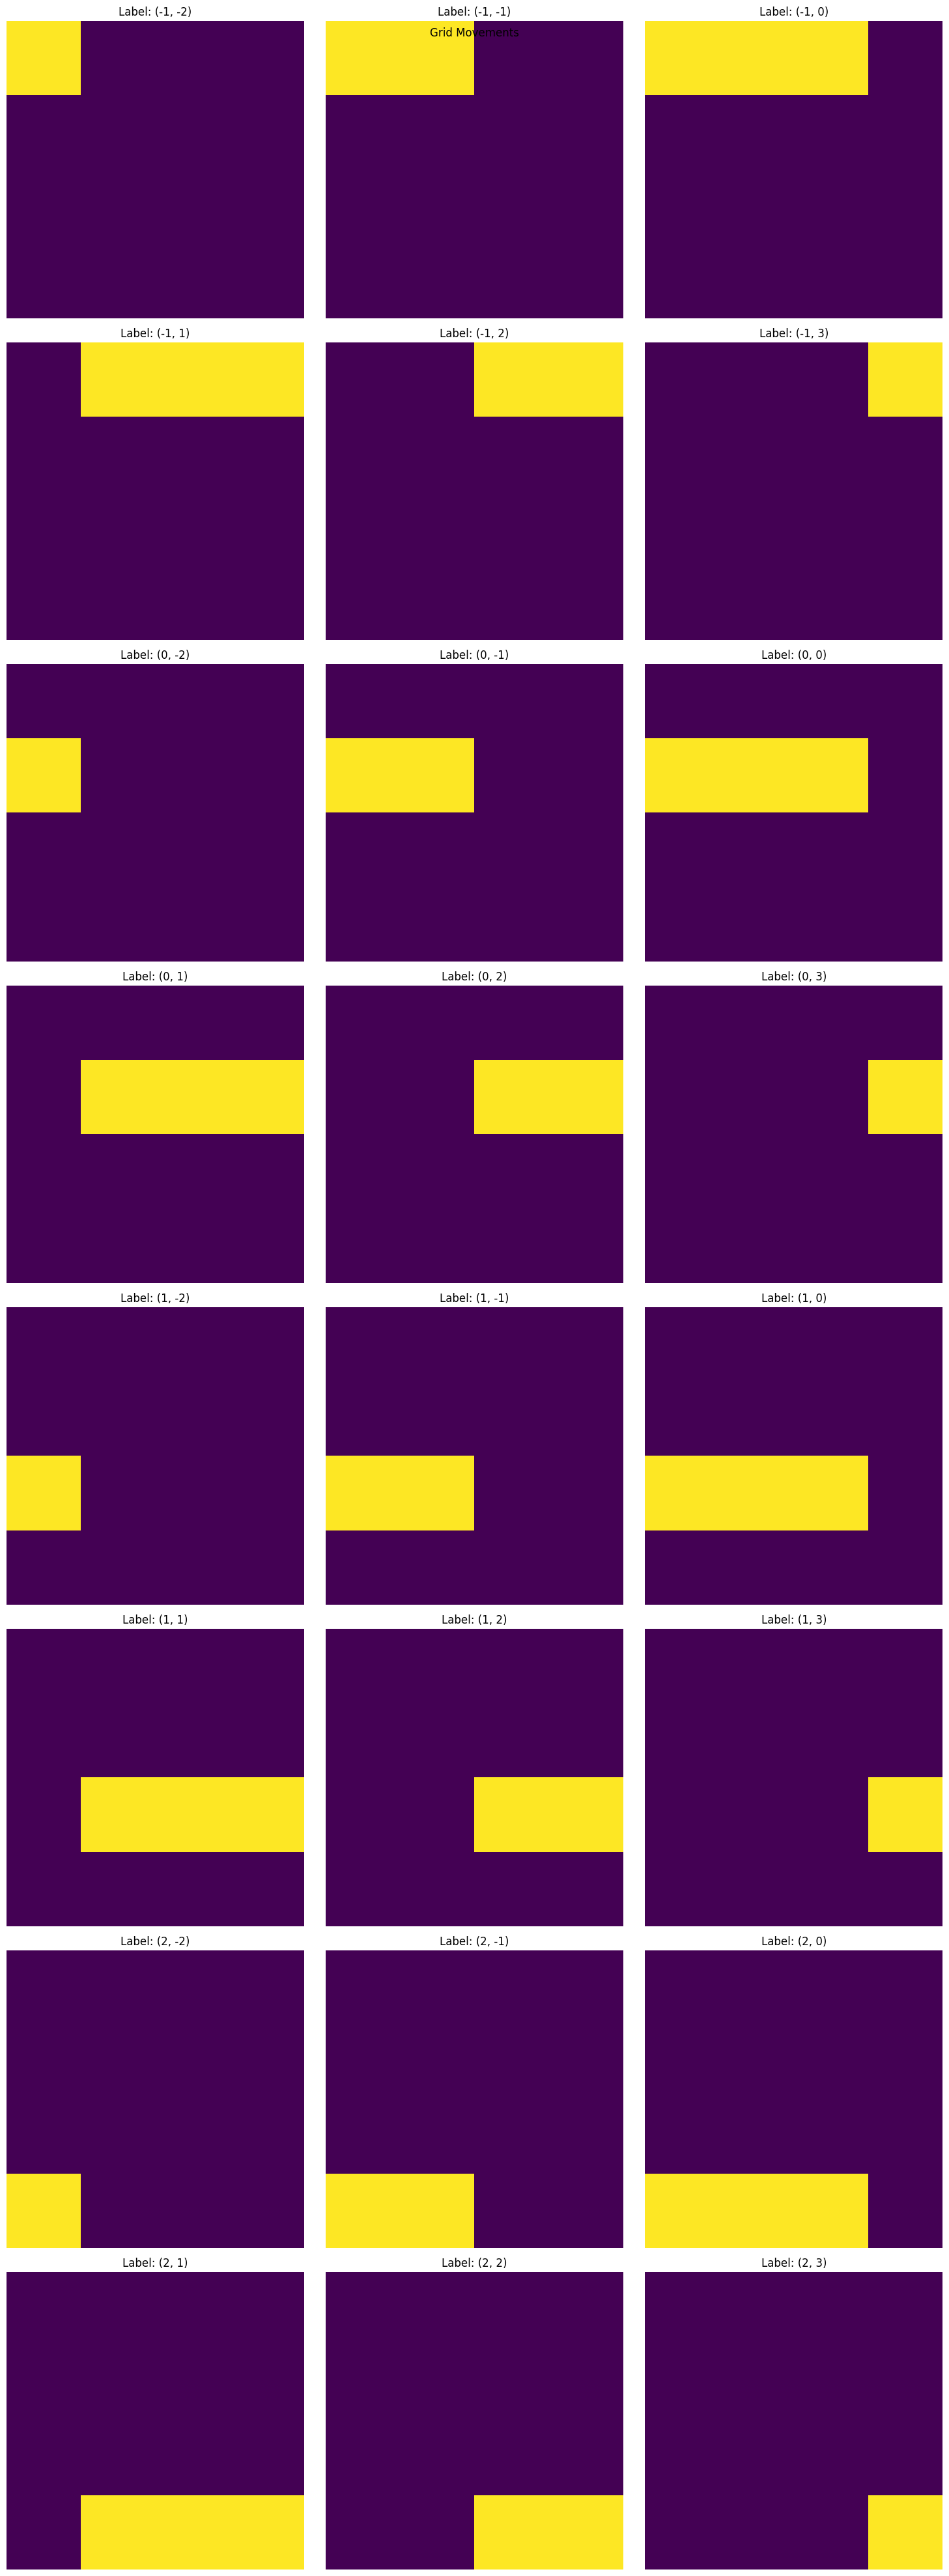

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grids_with_borders(grids, labels, title="Grid Movements"):
    num_grids = len(grids)
    cols = 3  # Number of columns in the subplot grid
    rows = (num_grids + cols - 1) // cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))  # Adjust figsize for larger grids
    fig.suptitle(title)

    for idx, (grid, label) in enumerate(zip(grids, labels)):
        ax = axes[idx // cols, idx % cols]
        grid_array = np.array(grid, dtype=int)
        ax.imshow(grid_array, cmap='viridis', interpolation='nearest')

        # Add grid lines for borders
        ax.set_xticks(np.arange(-0.5, grid_array.shape[1], 1), minor=True)
        ax.set_yticks(np.arange(-0.5, grid_array.shape[0], 1), minor=True)
        ax.grid(which="minor", color="white", linestyle='-', linewidth=1.5)
        ax.tick_params(which="minor", size=0)  # Hide minor ticks

        ax.set_title(f"Label: {label}")
        ax.axis('off')  # Turn off axis

    # Hide any unused subplots
    for idx in range(num_grids, rows * cols):
        fig.delaxes(axes[idx // cols, idx % cols])

    plt.tight_layout()
    plt.show()

# Example usage
grids = []
for movement in movements:
    moved_shape = apply_movement(example_shape, movement)
    grid_with_shape = paint_1d_to_2d_grid(moved_shape, color=5, grid=original_grid)
    grids.append(grid_with_shape)

plot_grids_with_borders(grids, movements)

# rest

In [ ]:



# Example usage
shape = [(0, 0), (0, 1), (1, 0), (1, 1)]  # Example shape coordinates
movements = [(1, 0), (0, 1), (1, 1)]  # Example movements
original_grid = [
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
]  # Example grid
shape_value = 5  # Example shape value

full_grid_shape = paint_1d_to_2d_grid(shape, color=shape_value, grid=original_grid)
print('original shape on grid')
printrows(full_grid_shape)

# def move_shape_and_print(shape, movements, original_grid, shape_value):
# move_shape_and_print(shape, movements, original_grid, shape_value)
for movement in movements:
    moved_shape = apply_movement(shape, movement)
    print()
    print(f"Movement: {movement}")
    grid_with_shape = paint_1d_to_2d_grid(moved_shape, color=shape_value, grid=original_grid)
    printrows(grid_with_shape)

original shape on grid
5 5 0 0
5 5 0 0
0 0 0 0
0 0 0 0

Movement: (1, 0)
0 0 0 0
5 5 0 0
5 5 0 0
0 0 0 0

Movement: (0, 1)
0 5 5 0
0 5 5 0
0 0 0 0
0 0 0 0

Movement: (1, 1)
0 0 0 0
0 5 5 0
0 5 5 0
0 0 0 0


In [ ]:
move_shape_and_print(shapes[0], all_possible_movements(shapes[0], input2), input2)

Movement: (0, -2)
0 0 0
x 1 1
0 0 0

Movement: (0, -1)
0 0 0
x x 1
0 0 0

Movement: (0, 0)
0 0 0
x x x
0 0 0

Movement: (0, 1)
0 0 0
1 x x
0 0 0

Movement: (0, 2)
0 0 0
1 1 x
0 0 0

Movement: (1, -2)
0 0 0
1 1 1
x 0 0

Movement: (1, -1)
0 0 0
1 1 1
x x 0

Movement: (1, 0)
0 0 0
1 1 1
x x x

Movement: (1, 1)
0 0 0
1 1 1
0 x x

Movement: (1, 2)
0 0 0
1 1 1
0 0 x

Movement: (2, -2)
0 0 0
1 1 1
0 0 0

Movement: (2, -1)
0 0 0
1 1 1
0 0 0

Movement: (2, 0)
0 0 0
1 1 1
0 0 0

Movement: (2, 1)
0 0 0
1 1 1
0 0 0

Movement: (2, 2)
0 0 0
1 1 1
0 0 0



In [ ]:
def convert_1d_to_2d(shape, color="x"):
    min_x = min(x for x, y in shape)
    max_x = max(x for x, y in shape)
    min_y = min(y for x, y in shape)
    max_y = max(y for x, y in shape)
    # print(shape)
    # print(f"min_x: {min_x}, max_x: {max_x}, min_y: {min_y}, max_y: {max_y}")
    coords = {}
    for x, y in shape:
        coords[(x, y)] = True

    results = []
    for i in range(min_x, max_x + 1):
        row = []
        for j in range(min_y, max_y + 1):
            if (i, j) in coords:
                row.append(color)
            else:
                row.append('0')
        results.append(row)
    return results

print("1d shape: ", shapes[0])
print("2d shape: ", convert_1d_to_2d(shapes[0]))

1d shape:  [(1, 0), (1, 1), (1, 2)]
2d shape:  [['x', 'x', 'x']]


In [ ]:
def normalize_shape(shape):
    min_x = min(x for x, y in shape)
    min_y = min(y for x, y in shape)
    return sorted((x - min_x, y - min_y) for x, y in shape)

norm_1d_shape = normalize_shape(shapes[0])
print("normalized 1d shape: ", norm_1d_shape)
print("normalized 2d shape: ", convert_1d_to_2d(norm_1d_shape))

normalized 1d shape:  [(0, 0), (0, 1), (0, 2)]
normalized 2d shape:  [['x', 'x', 'x']]


In [ ]:
def calculate_consistent_point_to_point_movement(input_shape, output_shape):
    if len(input_shape) != len(output_shape):
        raise ValueError("Input and output shapes must have the same number of points")

    print("calculate generalized movements")
    x_movement = None
    y_movement = None

    for input_coord, output_coord in zip(input_shape, output_shape):
        if x_movement is None:
            x_movement = output_coord[0] - input_coord[0]
        if y_movement is None:
            y_movement = output_coord[1] - input_coord[1]

        potentially_new_x_movement = output_coord[0] - input_coord[0]
        potentially_new_y_movement = output_coord[1] - input_coord[1]

        if potentially_new_x_movement != x_movement or potentially_new_y_movement != y_movement:
            return (None, None)

    return (x_movement, y_movement)

In [ ]:
input_shapes = find_shapes_any_color(input2)
output_shapes = find_shapes_any_color(output2)

In [ ]:
def find_generalized_movements(input_shapes, output_shapes):
    # print("raw input shape")
    # for row in input_shapes[0]:
        # print(row)
    normalized_input_shapes = [normalize_shape(shape) for shape in input_shapes]
    # print("raw output shape")
    # for row in output_shapes[0]:
        # print(row)
    normalized_output_shapes = [normalize_shape(shape) for shape in output_shapes]

    # TODO we need to group the input shapes in some way
    # - by color (all red shapes move like this)
    # - by shapes (all squares move like this)
    # - by color and shape (all red squares move like this)
    # - by shape and other attr (like count of unique colors)

    for i, norm_input_shape in enumerate(normalized_input_shapes):
        for j, norm_output_shape in enumerate(normalized_output_shapes):
            if norm_input_shape == norm_output_shape:
                raw_input_shape = input_shapes[i]
                raw_output_shape = output_shapes[j]
                return calculate_consistent_point_to_point_movement(raw_input_shape, raw_output_shape)

find_generalized_movements(input_shapes, output_shapes)

calculate generalized movements


(1, 0)

In [ ]:
def check_movement(input_grid, output_grid, movement):
    empty_grid = [[0] * len(input_grid[0]) for _ in range(len(input_grid))]
    for i in range(len(input_grid)):
        for j in range(len(input_grid[0])):
            if input_grid[i][j] != 0:
                empty_grid[i][j] = 1
    return empty_grid

input1_shapes = find_shapes_any_color(input1)
output1_shapes = find_shapes_any_color(output1)

NameError: name 'input1' is not defined

In [ ]:

def calculate_movements(input_shape, output_shape):
    movements = []
    for (ix, iy), (ox, oy) in zip(input_shape, output_shape):
        movements.append((ox - ix, oy - iy))
    return movements

def record_shape_movements(input_grid, output_grid):
    print("input grid")
    for row in input_grid:
        print(row)
    input_shapes = find_shapes_any_color(input_grid)
    normalized_input_shapes = [normalize_shape(shape) for shape in input_shapes]
    print('input:')
    for input_shape in input_shapes:
        for row in convert_1d_to_2d(input_shape):
            print(row)
    print('normalized input:')
    for input_shape in normalized_input_shapes:
        for row in input_shape:
            print(row)

    output_shapes = find_shapes_any_color(output_grid)
    normalized_output_shapes = [normalize_shape(shape) for shape in output_shapes]
    print('output:')
    for output_shape in output_shapes:
        for row in output_shape:
            print(row)
    print('normalized output:')
    for output_shape in normalized_output_shapes:
        for row in output_shape:
            print(row)

    for input_shape in normalized_input_shapes:
        if input_shape in normalized_output_shapes:
            output_shape = normalized_output_shapes[normalized_output_shapes.index(input_shape)]
            return calculate_movements(input_shape, output_shape)

    return None

# Example usage
movements = record_shape_movements(input1, output1)

input grid
[1, 1, 1]
[0, 0, 0]
[0, 0, 0]
input:
['x', 'x', 'x']
normalized input:
(0, 0)
(0, 1)
(0, 2)
output:
(1, 0)
(1, 1)
(1, 2)
normalized output:
(0, 0)
(0, 1)
(0, 2)


In [ ]:
def is_subset(small_shape, large_shape):
    # Check if all coordinates in small_shape are in large_shape
    return all(coord in large_shape for coord in small_shape)


In [ ]:
def input_in_output(input_grid, output_grid):
    """
    get the shapes in input, normalize to origin
    get the shapes in output, normalize to origin
    for each shape in input, check if it is in output
        if yes, return True
    """
    pass

input_in_output(input1, output1)

def get_steps_to_recreate():
